In [1]:
import os
import warnings
import sys

import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
PROJ_ROOT_PATH = os.path.dirname(os.getcwd())
sys.path.append(PROJ_ROOT_PATH)
DATA_PATH = os.path.join(PROJ_ROOT_PATH, "datasets")

In [2]:
synthesis_data = pd.read_csv(os.path.join(DATA_PATH, "Synthesised Time Series", "synthesised.csv"), index_col="id")
synthesis_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105
id,,,,,,,,,,,,,,,,,,,,,
0,25.0,25.168857,24.715599,24.277916,24.027045,23.903862,23.099880,22.619502,22.450067,22.136750,...,13.623944,13.656542,13.204566,13.414686,13.518331,13.544479,13.619775,13.679345,13.402996,13.557636
1,21.0,20.764716,19.956948,19.710582,19.301341,18.848625,18.033900,17.989180,17.485504,16.503814,...,16.071742,16.353189,16.918663,17.026205,17.213205,17.646249,17.883727,17.636658,19.453180,20.057058
2,19.0,18.912363,19.582829,19.409292,19.577184,19.987482,20.581422,21.069311,20.915548,21.400714,...,4.488784,4.241661,4.248950,4.143697,4.440768,4.395694,4.133176,4.012145,4.068881,2.916924
3,23.0,22.877990,23.433526,24.324950,24.358498,24.738647,25.654500,25.933526,26.196802,27.099793,...,24.198968,24.048091,23.835752,23.532187,23.426798,23.362099,23.446236,23.666149,21.995872,21.410275
4,25.0,24.971022,24.305882,23.203562,22.440854,21.559851,20.203296,19.479367,18.399220,17.679928,...,10.499446,10.827831,8.113812,8.583054,8.555737,9.514210,9.333950,9.496314,9.628866,8.863811


# PLA, KMean

In [3]:
from methods.clusterization.kmeans import get_kmeans_clusters, elbow_method
from methods.lin_approximation.lin_approximation import get_pla_approximation

app_data = get_pla_approximation(synthesis_data, num_periods=20)

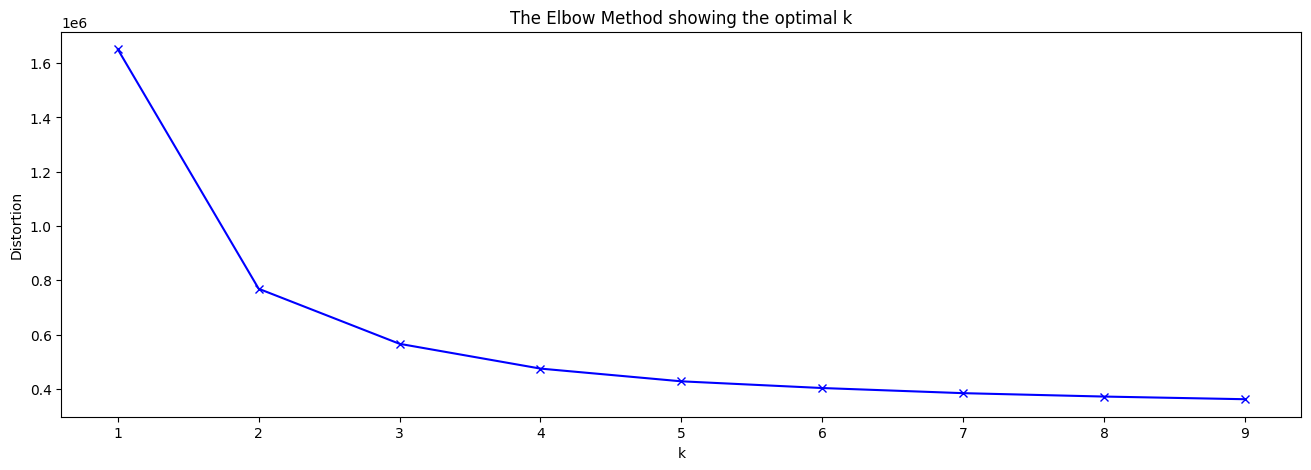

In [4]:
K = 10
elbow_data = elbow_method(app_data, max_num_clusters=K)

plt.figure(figsize=(16,5))
plt.plot(range(1,K), elbow_data, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [5]:
from src.plotting.plot_time_series import plot_timeseries, plot_timeseries_clusters

clusters = get_kmeans_clusters(app_data, num_clusters=3)

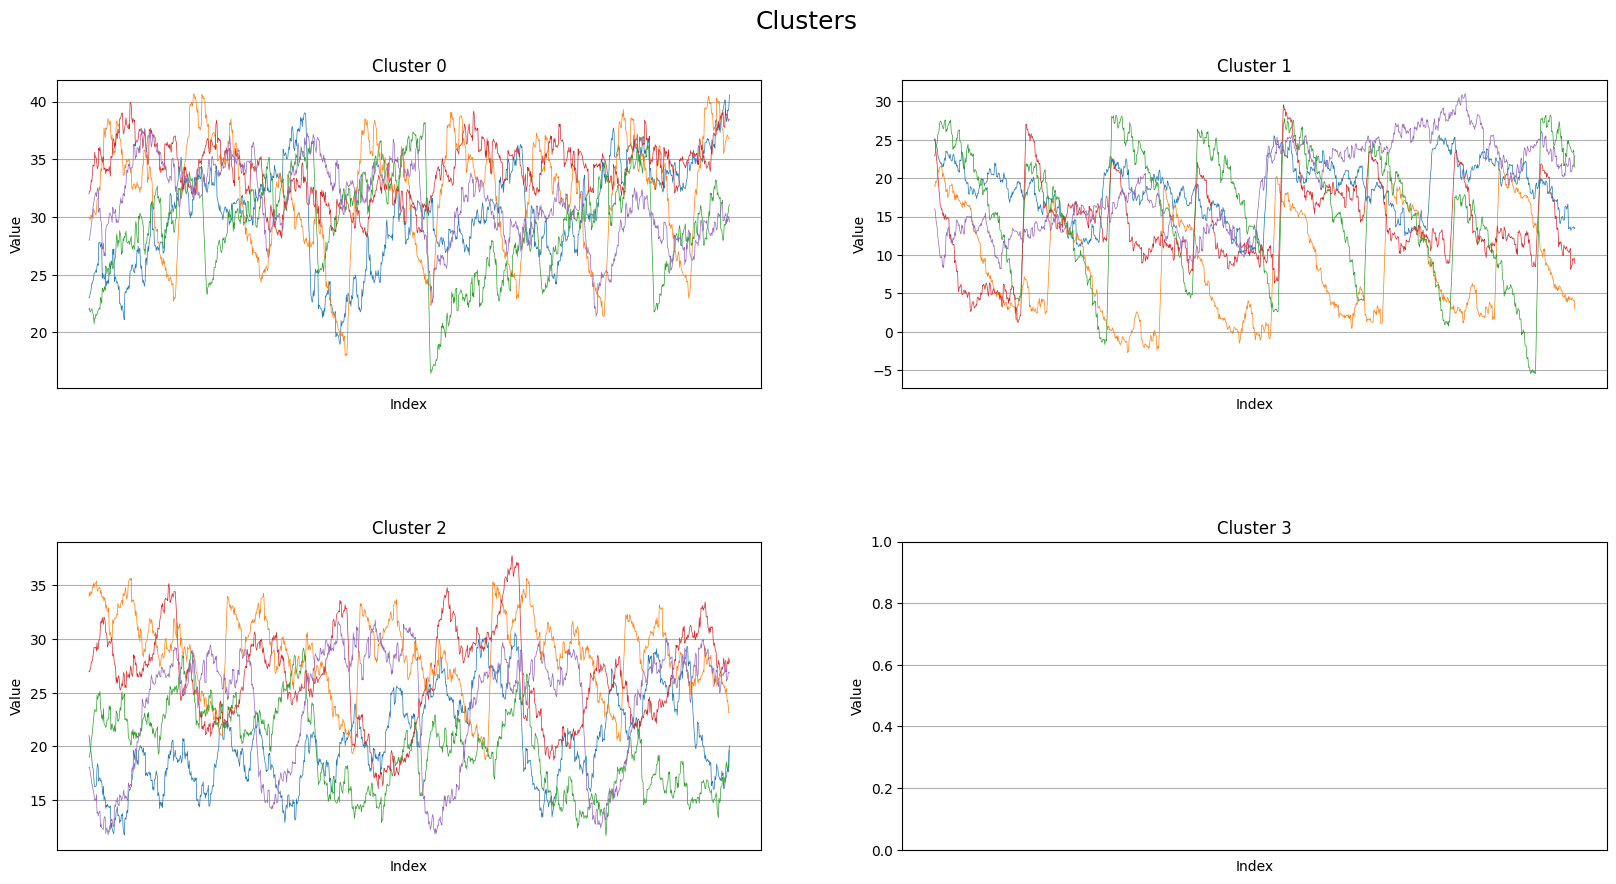

In [9]:
plot_timeseries_clusters(synthesis_data.assign(cluster=clusters),num_saples=5, num_clusters=3)

Попробуем теперь отскалировать данные и только потом кластеризовать

In [10]:
from src.normalization.scaling import scale_data

scaled_data = scale_data(app_data)

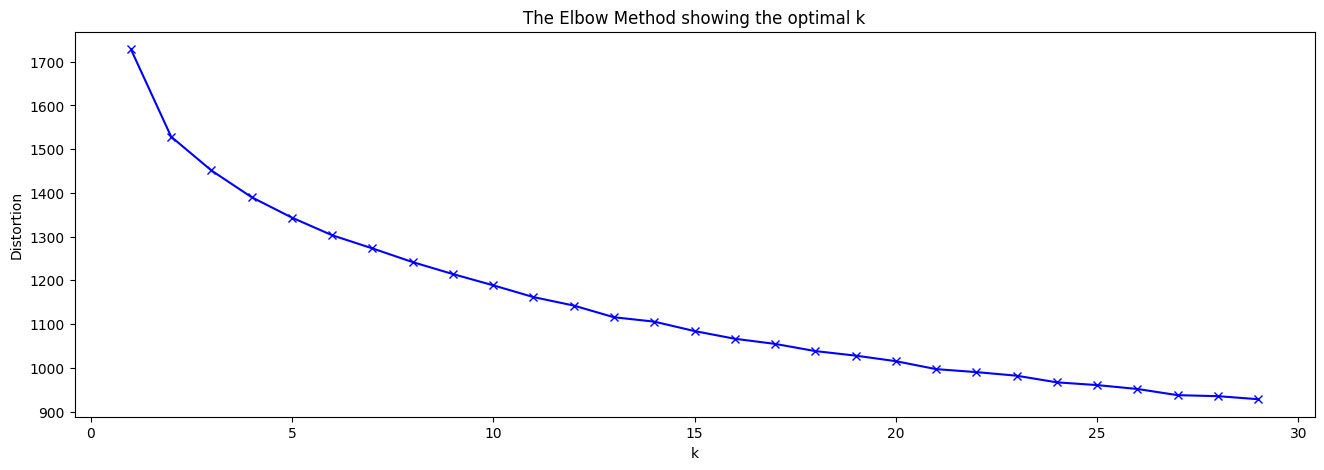

In [17]:
K = 30
elbow_data = elbow_method(scaled_data, max_num_clusters=K)

plt.figure(figsize=(16,5))
plt.plot(range(1,K), elbow_data, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

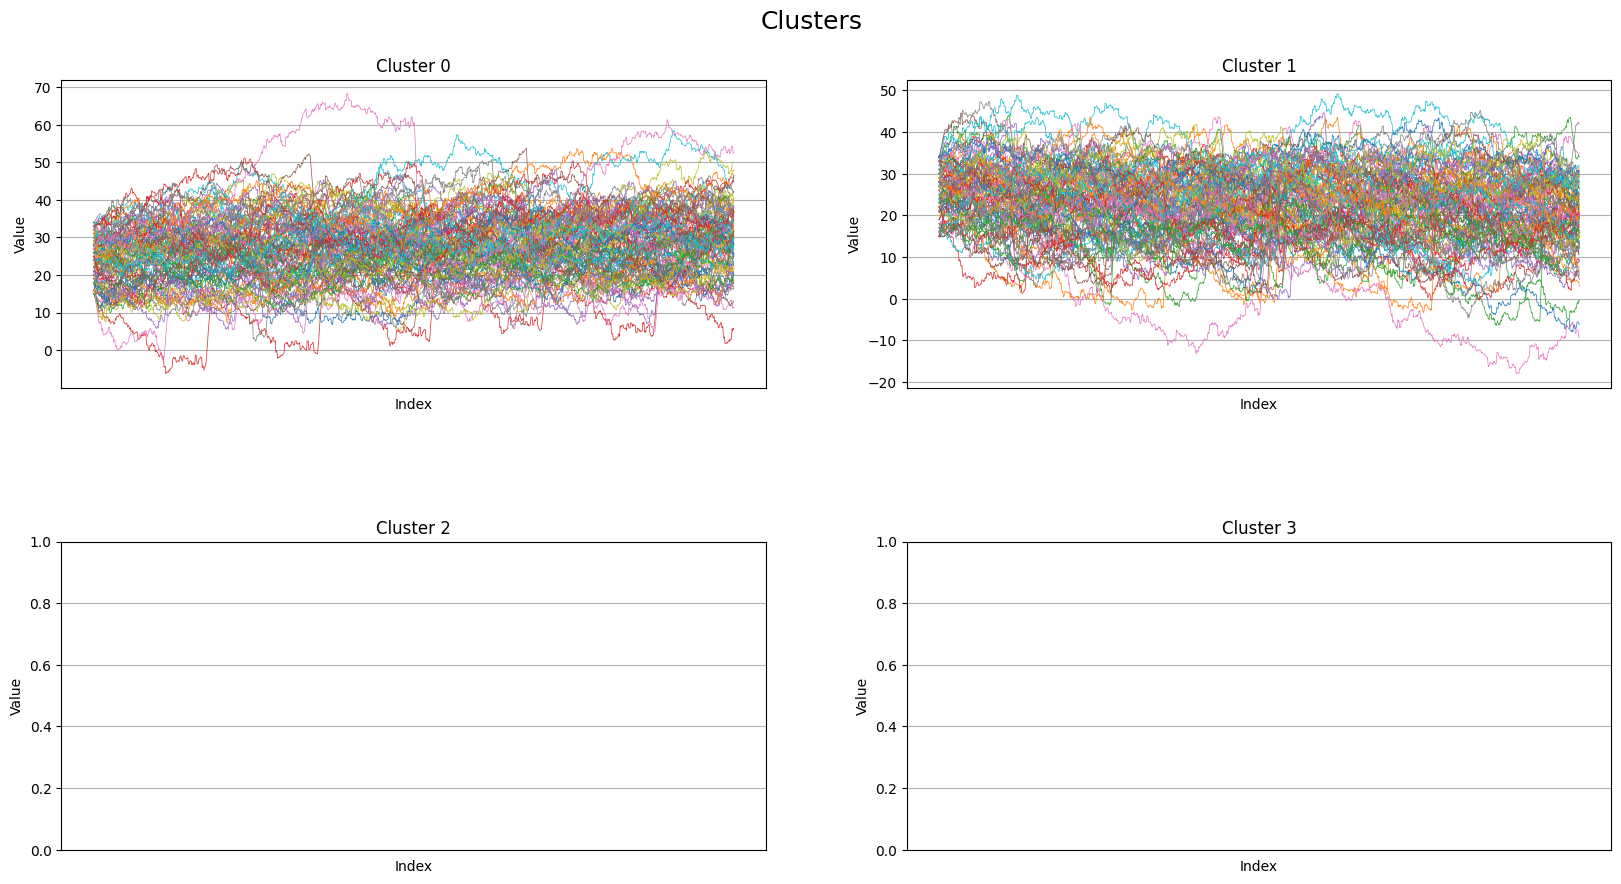

In [22]:
clusters = get_kmeans_clusters(scaled_data, num_clusters=2)
plot_timeseries_clusters(synthesis_data.assign(cluster=clusters),num_saples=100, num_clusters=2)

# PCA, KMean

In [32]:
from methods.pca_approximation.PCA import get_pca_approximation

pca_data = get_pca_approximation(synthesis_data, num_components=2)

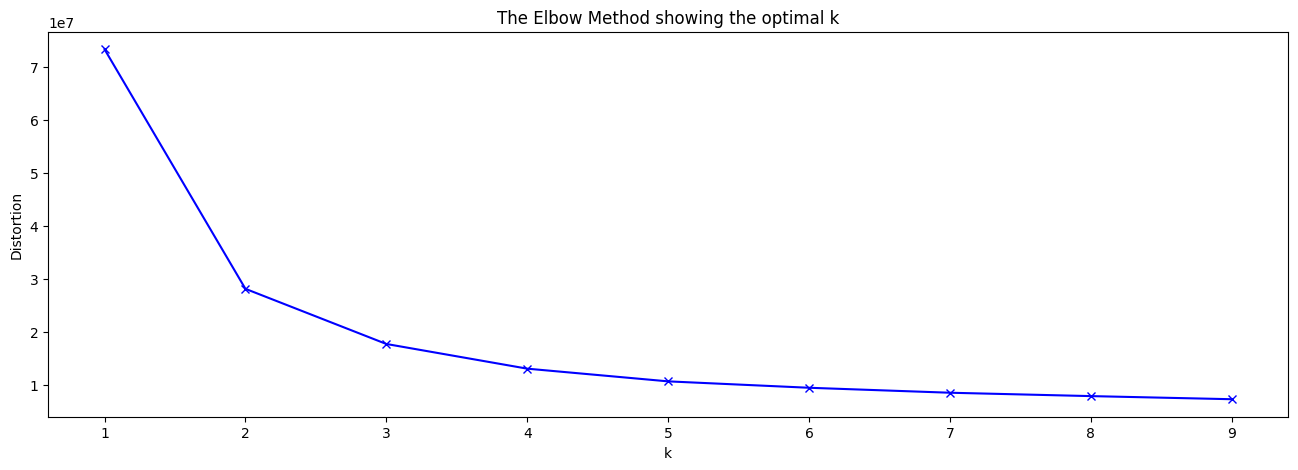

In [33]:
K = 10
elbow_data = elbow_method(pca_data, max_num_clusters=K)

plt.figure(figsize=(16,5))
plt.plot(range(1,K), elbow_data, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [42]:
clusters = get_kmeans_clusters(pca_data, num_clusters=3)

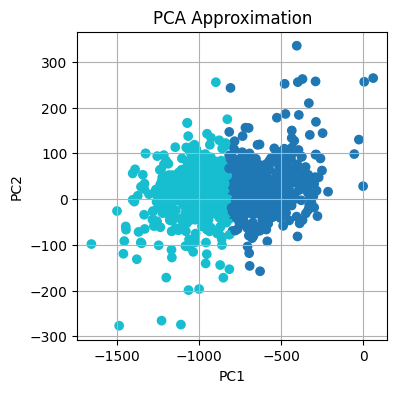

In [43]:
plt.figure(figsize=(4,4))
plt.title("PCA Approximation")
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap="tab10")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, which="both", axis="both")
plt.show()

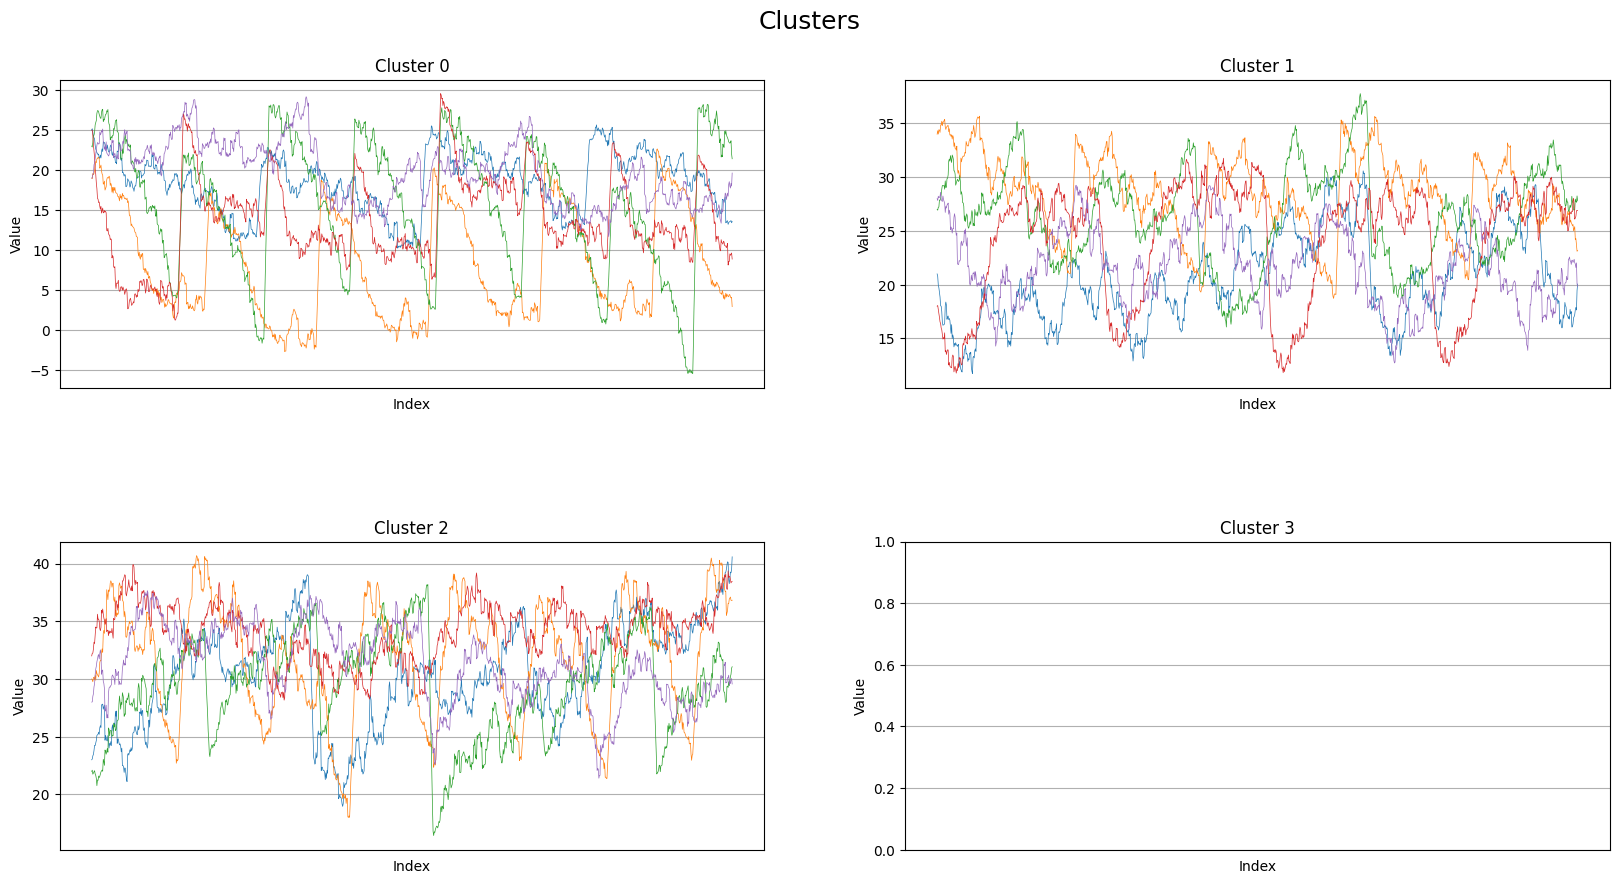

In [41]:
plot_timeseries_clusters(synthesis_data.assign(cluster=clusters),num_saples=5, num_clusters=3)